# Varbench dataset statistics
This notebook contains misceleaneous statistics on the input (manually curated) dataset

In [2]:
import pandas as pd

# Login using e.g. `huggingface-cli login` to access this dataset
splits = {'benchmark': 'tikz/benchmark-00000-of-00001.parquet', 'test': 'tikz/test-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/CharlyR/varbench/" + splits["benchmark"])

/home/creux/miniconda3/envs/varbench/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [41]:
df.columns

Index(['difficulty_ast', 'id', 'code', 'commented_code', 'instruction',
       'result_description', 'difficulty', 'modification_type', 'type',
       'patch', 'code_solution', 'image_solution', 'image_input'],
      dtype='object')

In [ ]:
df[["code","id","type"]].groupby(["code","type"]).count().describe()#number of unique input code and avg edits per code

,id
count,45.000000
mean,2.222222
std,1.579541
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,5.000000


In [ ]:
df[["id","modification_type"]].groupby("modification_type").count()#number of types of changes

,id
modification_type,
add,25
remove,13
update,62


In [12]:
df[["id","difficulty"]].groupby("difficulty").count()#number of difficulty levels

,id
difficulty,
easy,41
hard,23
medium,36


,difficulty_ast
count,100.000000
mean,20.420000
std,32.892597
min,1.000000
25%,2.000000
50%,6.000000
75%,20.000000
max,160.000000


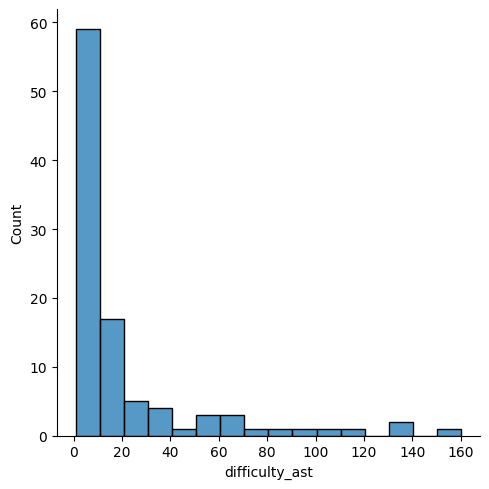

In [43]:
import seaborn as sb
sb.displot(x=df["difficulty_ast"],binwidth=10)
df[["difficulty_ast"]].describe()#number of difficulty levels


,len_code,len_char_code
count,100.00000,100.000000
mean,63.07000,2166.900000
std,15.61549,511.924996
min,25.00000,918.000000
25%,54.00000,1759.000000
50%,61.00000,2157.000000
75%,73.00000,2471.000000
max,104.00000,3323.000000


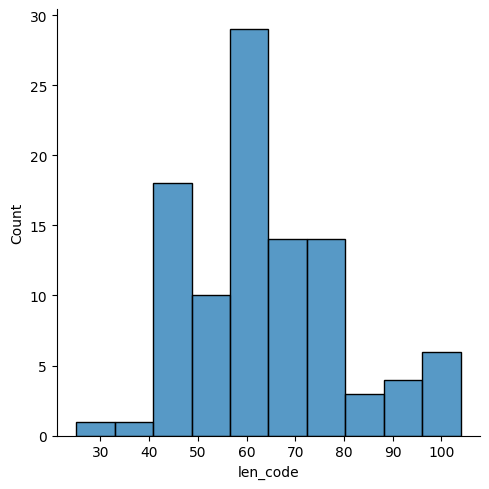

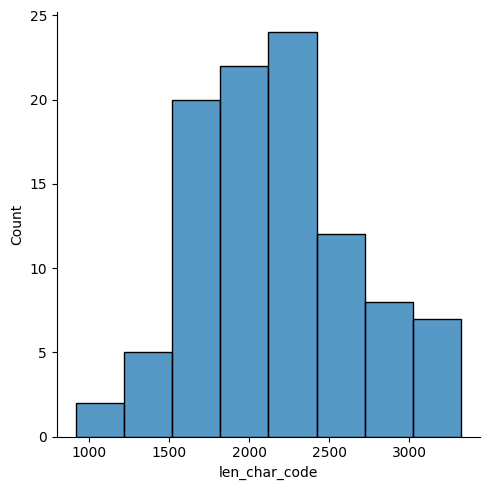

In [40]:
tmpdf = df[["code", "id"]].drop_duplicates()


def cal_len(row):
    row["len_code"] = len(row["code"].splitlines())
    row["len_char_code"] = len(row["code"])
    return row


tmpdf = tmpdf.apply(cal_len, axis=1)
sb.displot(x=tmpdf["len_code"])
sb.displot(x=tmpdf["len_char_code"])
tmpdf.apply(cal_len, axis=1).describe()